# Data Analysis for Customs and Border Protection - Apprehensions and Deaths


- Data File Name: sector_profile_1960_2018.csv

CSV file has:


- border patrol apprehensions of incoming undocumented immigrants(total count, count of minor apprehensions(unaccompanied and accompanied), and family apprehensions) for each sector and aggregated count for southwest border per fiscal year 

- border patrol total deaths, rescues, and assaults (deaths: known reported death count of incoming undocumented migrants that die on the southern border) for each sector and aggregated count for southwest border per fiscal year 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
swborder_checkpoints_df = pd.read_csv('../data/sector_profile_1960_2018.csv')

In [3]:
swborder_checkpoints_df.shape #590 rows and 18 columns 

(590, 18)

In [4]:
swborder_checkpoints_df.columns

Index(['sector', 'fiscal_year', 'number_of_agents', 'total_apprehensions',
       'other_than_mexican_apprehensions', 'marijuana_pounds',
       'cocaine_pounds', 'accepted_prosecutions', 'assaults', 'rescues',
       'deaths', 'accompanied_juveniles', 'unaccompanied_juveniles',
       'total_juveniles', 'total_adults', 'female_apprehensions',
       'male_apprehensions', 'family_apprehensions'],
      dtype='object')

In [5]:
swborder_checkpoints_df #showing stats by southwest sector per fiscal year 

,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,yuma,1960,NaN,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
swborder_checkpoints_df['death_rate_perc'] = swborder_checkpoints_df['deaths']/swborder_checkpoints_df['total_apprehensions']*100

swborder_checkpoints_df['death_rate_perc'] = swborder_checkpoints_df['death_rate_perc'].round(decimals=2) 

swborder_checkpoints_df


,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions,death_rate_perc
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0,0.12
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0,0.15
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0,0.06
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0,0.01
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,yuma,1960,NaN,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
swborder_checkpoints_df['fiscal_year'].min()

1960

# Looking at Apprehension data 

### Clear that there is an increase in CBP budget from 1990 to 2018. Can this visualize the Prevention Through Deterrence Initiatives?

#Prevention through Deterrance Operations: border security operations/initiatives/proposals that heavily enforced crossing points along the southern border in terms of funding, agents and other staff, and equipment (budget increases for CBP) 

Prevention through Deterrence Operations:
- Operation Blockade: El Paso and Ciudad Juarez Sept. 1993

- Operation Gatekeeper: Southern California 1994

- Operation Safeguard: Arizona 1994 1999 (tucson, yuma)

- Operation Rio Grande: South Texas 1997

Other Border Control Initiatives: 
- Secure Fence Act of 2006: authorized and partially funded the construction of 700 miles of fence/wall along the southern border (Signed October 2006)


* We can see the bump in funding in 1993 (\\$400 to \\$452 million) and 1994 (\\$452 to \\$568 million),  bump in funding in 1997 (\\$877 to \\$917 million), 1999 (\\$1055 to \\$1146 million), and decrease in funding in 2006 (\\$2278 to \\$2245 million) when the operations were approved and implemented. 

#but how to code the percentage increases in the budget from year to year? to prove that these operations brought more money into CBP than regular year-to-year growth 

#question: did these operations deter illegal migration or not? to do this, bar plot total southwest border apprehensions(southwest border, total_apprehensions) over time(fiscal_year) 

In [8]:
#subset df by sector='southwest border' (which will give you the overall data(agreggated) for each year)
row_filter = swborder_checkpoints_df['sector']=='southwest border'
row_filter
swborder_overall=swborder_checkpoints_df[(row_filter)]


In [9]:
swborder_overall['total_apprehensions'].max() #max of 1643679 total apprehensions for the southern border for fiscal year 2000 

1643679

In [10]:
swborder_overall2=swborder_overall.set_index('fiscal_year')
swborder_overall2

,sector,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions,death_rate_perc
fiscal_year,,,,,,,,,,,,,,,,,,
2018,southwest border,16608.0,396579,244322.0,458834.00,4838.00,109317.0,774.0,4307.0,283.0,57210.0,50036.0,107246.0,289333.0,95980.0,300599.0,14554.0,0.07
2017,southwest border,16605.0,303916,175978.0,857888.00,6174.00,59805.0,774.0,3221.0,294.0,41131.0,41435.0,82566.0,221350.0,80857.0,223059.0,6074.0,0.10
2016,southwest border,17026.0,408870,218110.0,1292105.00,4184.00,74255.0,439.0,3964.0,322.0,42413.0,59692.0,102105.0,306765.0,100515.0,308355.0,6169.0,0.08
2015,southwest border,17522.0,331333,145316.0,1536499.00,4294.00,78324.0,373.0,2183.0,240.0,22004.0,39970.0,61974.0,269359.0,71463.0,259870.0,1734.0,0.07
2014,southwest border,18156.0,479371,252600.0,1920411.00,4443.00,91729.0,366.0,1457.0,307.0,38845.0,68541.0,107386.0,371985.0,119415.0,359956.0,675.0,0.06
2013,southwest border,18611.0,414397,148988.0,2428419.00,3910.00,103040.0,461.0,2346.0,445.0,8479.0,38759.0,47238.0,367159.0,68645.0,345752.0,220.0,0.11
2012,southwest border,18516.0,356873,94532.0,2297662.00,5992.10,92205.0,549.0,1312.0,463.0,6436.0,24403.0,30839.0,326034.0,51620.0,305253.0,NaN,0.13
2011,southwest border,18506.0,327577,46997.0,2518211.42,8762.73,74975.0,666.0,1070.0,357.0,6902.0,15949.0,22851.0,304726.0,42590.0,284984.0,NaN,0.11
2010,southwest border,17535.0,447731,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08


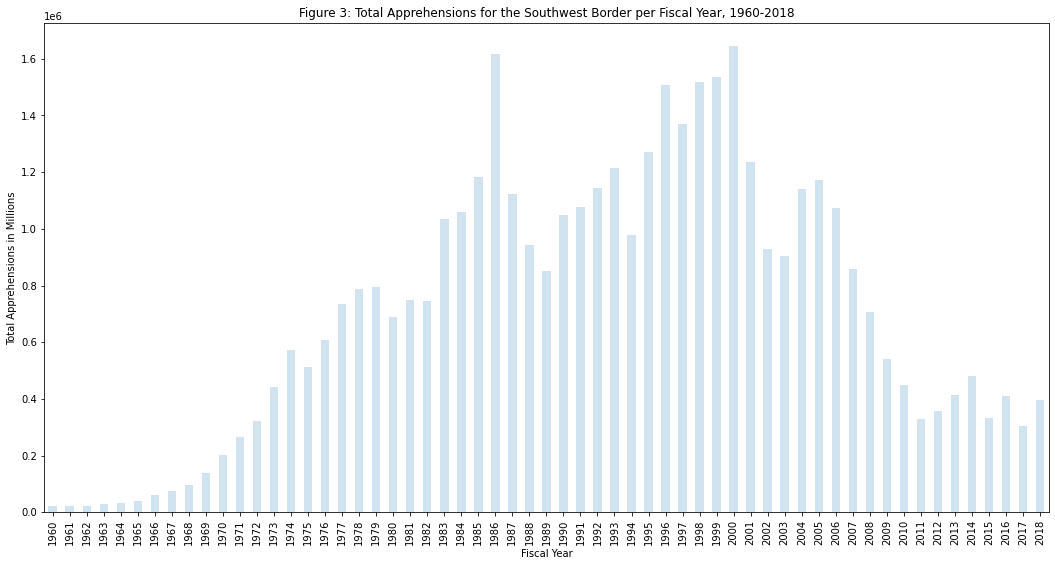

In [34]:
ax2=swborder_overall.plot(kind='bar', x='fiscal_year', y='total_apprehensions', legend=False, alpha=0.2, figsize=(18,9))

plt.xlabel('Fiscal Year')
plt.ylabel('Total Apprehensions in Millions')
plt.title('Figure 3: Total Apprehensions for the Southwest Border per Fiscal Year, 1960-2018');

#flipping the x-axis to be 1960-2018 instead of 2018-1960
ax2.invert_xaxis()

#how to get apprehensions  value count instead of decimals and 

## Prevention Through Deterrence Operations did not fully deter undocumented immigrants from crossing the southern border(as in we did not see a sharp decrease), at least not in the time periods after they were implemented  (assuming that a higher # of apprehensions are correlated with a higher # of migrants crossing the border overall )
- Operation Blockade: Put in place 1993. But we see an increase in total apprehensions for FY 1994-1995 (jump from 979101 in FY 1994 to 1271390 in FY 1995)

- Operation Gatekeeper: Put in place 1994. But we see an increase in total apprehensions for FY 1995-1996 (jump from 1271390 in FY 1995 to 1507020 IN FY 1996 )

- Operation Safeguard:Put in place 1999. We see a decrease in total apprehensions for FY 2000-2001 (decrease from 1643679 in FY 2000 to 1235718 in FY 2001). But considering this was the highest year overall, maybe we should treat as an outlier ?

- Operation Rio Grande: Put in place 1997. But we see an increase in total apprehensions for FY 1998-1999 (jump from 1516680 in FY 1998 to 1537000 in FY 1999)

Other Border Control Initiatives: 
- Secure Fence Act of 2006: Put in place 2006. We see a decrease in total apprehensions for FY 2007-2008 (decrease from 858638 in FY 2007 to 705005 in FY 2008)

### More Questions: 
-  did these operations deter illegal migration or not? to do this, bar plot total southwest border apprehensions(southwest border, total_apprehensions) over time(fiscal_year) 
- Though apprehensions have declined, if migrant deaths have increased, might not mean migrants are being deterred. Might just mean they've been pushed to more dangerous paths of crossing and thus are dying are higher counts. 
 - Would need to make another bar chart for this, or overlay a line graph on top of a bar graph  
 
## Some other observations 
- we see that FY 2000 had the highest # of southern border crossings, with 1643679 total apprehensions 
- we see that FY 1986 had second highest # of southern border crossings, with 1615844 total apprehensions 
- followed by years 1999(1537000 total apprehensions) and 1998(1516680 total apprehensions)



Notes: - 
#putting labels signifying y values on top of each bar (code follows>>)

- create a list to collect the plt.patches data
-totals = []

- find the values and append to list
-for i in ax2.patches:
    totals.append(i.get_height())

- set individual bar labels using above list
-total = sum(totals)

- set individual bar labels using above list
- for i in ax2.patches:
    #get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+1.5, i.get_height()+2.7, \
            str(round((i.get_height()), 2)), fontsize=7, color='black')
    


## Lets breakdown these apprehensions by those that were family apprehensions and those that were juveniles (stacked bar plot)

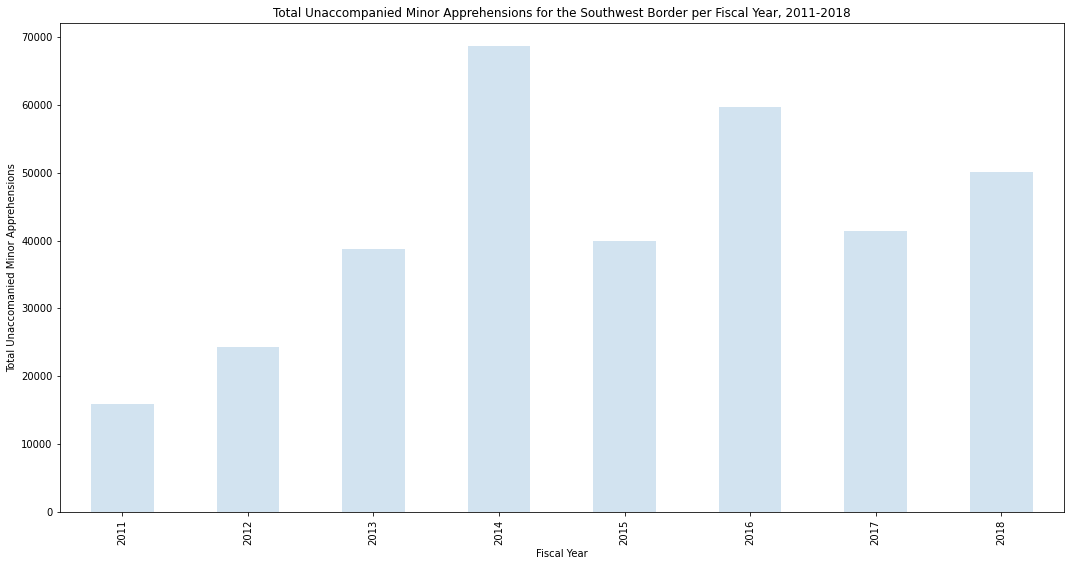

In [12]:
#regular bar plot for unaccompanied minors over FY 

year_filter_apprehensions = swborder_overall['fiscal_year']>2010


uminors_over_time=swborder_overall[year_filter_apprehensions].plot(kind='bar', x='fiscal_year', y='unaccompanied_juveniles', legend=False, alpha=0.2, figsize=(18,9))

plt.xlabel('Fiscal Year')
plt.ylabel('Total Unaccomanied Minor Apprehensions')
plt.title('Total Unaccompanied Minor Apprehensions for the Southwest Border per Fiscal Year, 2011-2018');


uminors_over_time.invert_xaxis()
#Unaccompanied mionrs increasing until 2014 and then dramatically jagged (increasing/decreasing) afterwards 


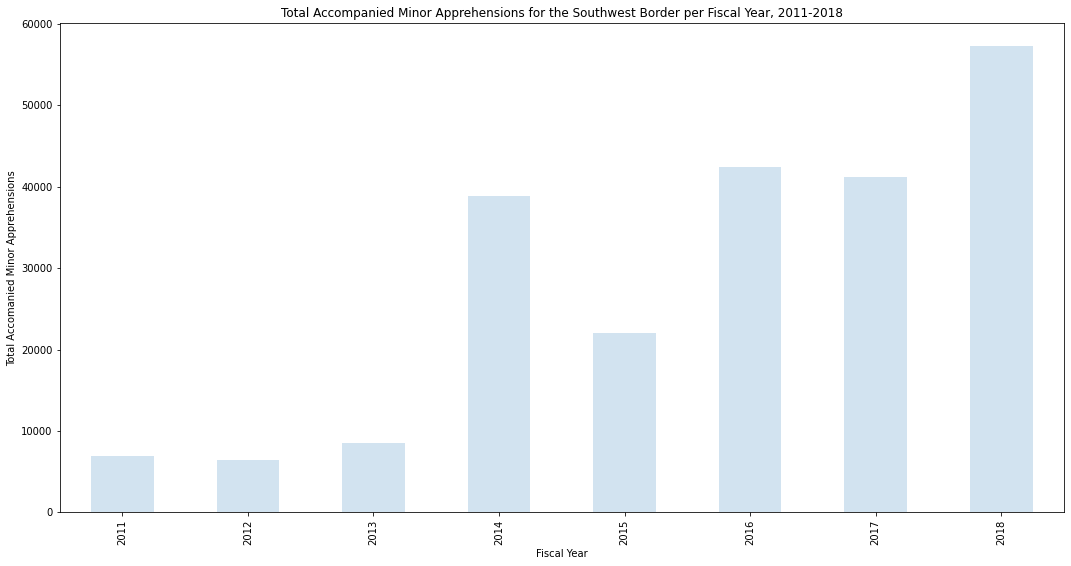

In [13]:
#regular bar plot for accompanied minors over FY 
aminors_over_time=swborder_overall[year_filter_apprehensions].plot(kind='bar', x='fiscal_year', y='accompanied_juveniles', legend=False, alpha=0.2, figsize=(18,9))

plt.xlabel('Fiscal Year')
plt.ylabel('Total Accomanied Minor Apprehensions')
plt.title('Total Accompanied Minor Apprehensions for the Southwest Border per Fiscal Year, 2011-2018');


aminors_over_time.invert_xaxis()
#Accompanied Minors Apprehensions Increasing 

<AxesSubplot:title={'center':'Total Family Apprehensions for the Southwest Border per Fiscal Year, 1960-2018'}, xlabel='Fiscal Year', ylabel='Total Family Apprehensions'>

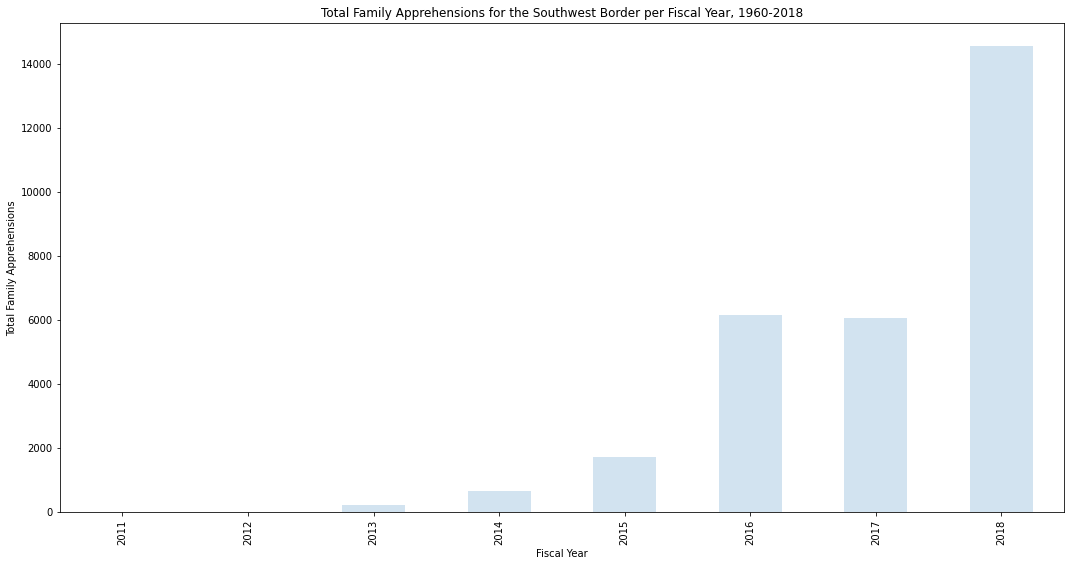

In [42]:
#regular bar plot for family apprehensions over FY 

families_over_time=swborder_overall[year_filter_apprehensions].plot(kind='bar', x='fiscal_year', y='family_apprehensions', legend=False, alpha=0.2, figsize=(18,9))

plt.xlabel('Fiscal Year')
plt.ylabel('Total Family Apprehensions')
plt.title('Total Family Apprehensions for the Southwest Border per Fiscal Year, 1960-2018');


families_over_time.invert_xaxis()
#Family Apprehensions Increasing 


In [15]:
swborder_overall2.head()

,sector,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions,death_rate_perc
fiscal_year,,,,,,,,,,,,,,,,,,
2018,southwest border,16608.0,396579,244322.0,458834.0,4838.0,109317.0,774.0,4307.0,283.0,57210.0,50036.0,107246.0,289333.0,95980.0,300599.0,14554.0,0.07
2017,southwest border,16605.0,303916,175978.0,857888.0,6174.0,59805.0,774.0,3221.0,294.0,41131.0,41435.0,82566.0,221350.0,80857.0,223059.0,6074.0,0.10
2016,southwest border,17026.0,408870,218110.0,1292105.0,4184.0,74255.0,439.0,3964.0,322.0,42413.0,59692.0,102105.0,306765.0,100515.0,308355.0,6169.0,0.08
2015,southwest border,17522.0,331333,145316.0,1536499.0,4294.0,78324.0,373.0,2183.0,240.0,22004.0,39970.0,61974.0,269359.0,71463.0,259870.0,1734.0,0.07
2014,southwest border,18156.0,479371,252600.0,1920411.0,4443.0,91729.0,366.0,1457.0,307.0,38845.0,68541.0,107386.0,371985.0,119415.0,359956.0,675.0,0.06


<AxesSubplot:title={'center':'Figure 4: Number of Apprehensions by Type for Fiscal Years, 2011-2018'}, xlabel='Fiscal Year', ylabel='Number of Apprehensions'>

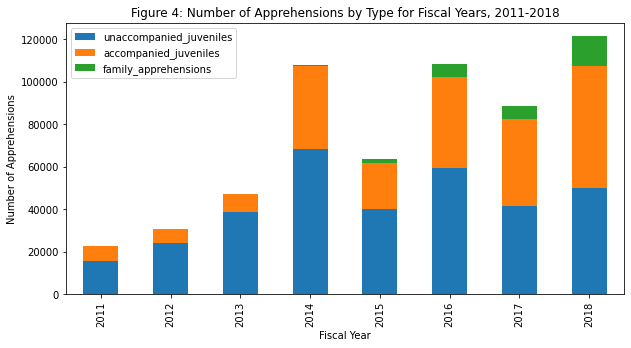

In [41]:
# select the columns to use in the plot
cols_to_plot = ['unaccompanied_juveniles', 'accompanied_juveniles', 'family_apprehensions']

# resort the rows for year order
swborder_overall2 = swborder_overall2.sort_index()

# select the rows you want to plot
year_filter = swborder_overall2.index>2010

swborder_overall2[year_filter][cols_to_plot].plot(kind='bar', stacked=True, xlabel='Fiscal Year', ylabel='Number of Apprehensions', title='Figure 4: Number of Apprehensions by Type for Fiscal Years, 2011-2018', figsize=(10,5))

In [17]:
swborder_overall2[year_filter][cols_to_plot]

,unaccompanied_juveniles,accompanied_juveniles,family_apprehensions
fiscal_year,,,
2011,15949.0,6902.0,NaN
2012,24403.0,6436.0,NaN
2013,38759.0,8479.0,220.0
2014,68541.0,38845.0,675.0
2015,39970.0,22004.0,1734.0
2016,59692.0,42413.0,6169.0
2017,41435.0,41131.0,6074.0
2018,50036.0,57210.0,14554.0


##### Looking at apprehensions by sector 

In [18]:
swborder_sectors_df=swborder_checkpoints_df[(-row_filter)]
swborder_sectors_df

,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions,death_rate_perc
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0,0.12
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0,0.15
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0,0.06
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0,0.01
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,laredo,1960,NaN,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
region_uminors_means=swborder_sectors_df.groupby('sector')['unaccompanied_juveniles'].mean()
region_family_means=swborder_sectors_df.groupby('sector')['family_apprehensions'].mean()
region_aminors_means=swborder_sectors_df.groupby('sector')['accompanied_juveniles'].mean()

Text(0.5, 1.0, 'Number of Accompanied Minors  by Sector')

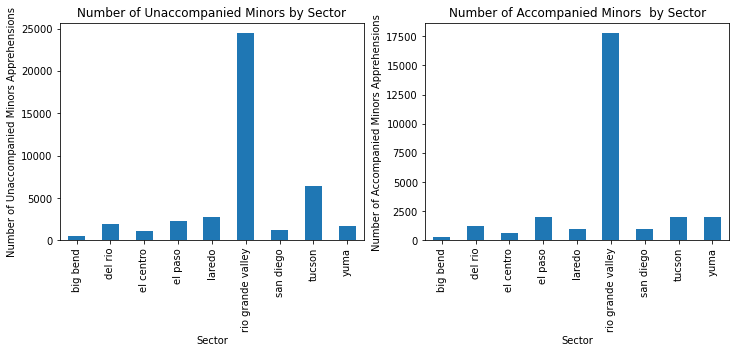

In [45]:
# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))


# 2. the plt.subplot() function divides the main figure into rows and columns
#    121 = 1 row 2 columns and the first slot

plt.subplot(121)

# use the region mean data to plot a bar chart and add labels
region_uminors_means.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Unaccompanied Minors Apprehensions')
plt.title('Number of Unaccompanied Minors by Sector')

# 3. the plt.subplot() function divides the main figure into rows and columns
#    122 = 1 row 2 columns and the second slot

plt.subplot(122)

# use the region mean data to plot a bar chart and add labels

region_aminors_means.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Accompanied Minors Apprehensions')
plt.title('Number of Accompanied Minors  by Sector')


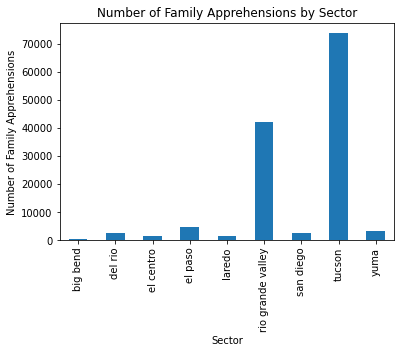

In [21]:
region_family_means.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Family Apprehensions')
plt.title('Number of Family Apprehensions by Sector');


#### Observations
- Rio Grande Valley has highest average mean of apprehensions for unaccompanied and accompanied children 

- Tucson sector has highest average mean of apprehensions for families

### Looking at Unaccompanied Minor Apprehensions by sector over fiscal years 

In [22]:
swborder_sectors_df

,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions,death_rate_perc
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0,0.12
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0,0.15
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0,0.06
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0,0.01
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,laredo,1960,NaN,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


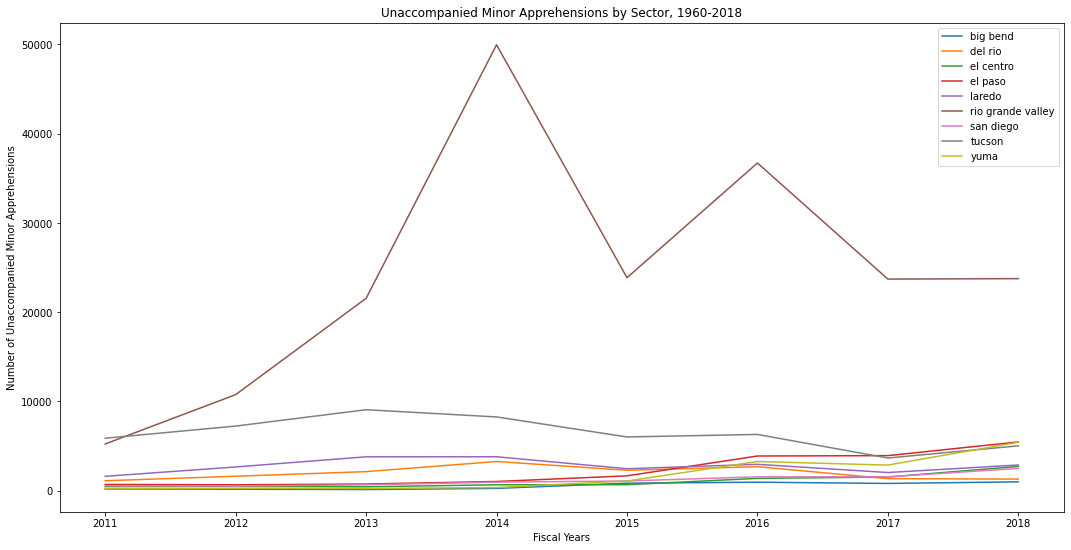

In [23]:
swborder_sectors_df.index=swborder_sectors_df['fiscal_year'].astype(int)
apprehension_uminors_plot=swborder_sectors_df.groupby('sector')['unaccompanied_juveniles'].plot(figsize=(18,9), legend=True, xlabel='Fiscal Years', ylabel='Number of Unaccompanied Minor Apprehensions', title='Unaccompanied Minor Apprehensions by Sector, 1960-2018')

#okay but why does it cut off everything after 1967?

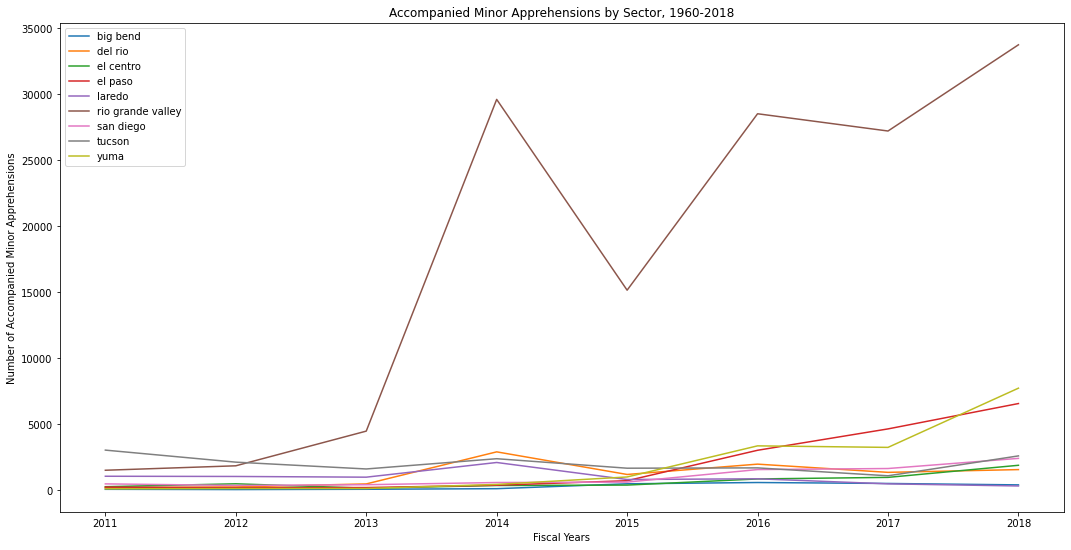

In [24]:
apprehension_aminors_plot=swborder_sectors_df.groupby('sector')['accompanied_juveniles'].plot(figsize=(18,9), 
                                                                                                    legend=True, ylabel='Number of Accompanied Minor Apprehensions',
                                                                                                   xlabel='Fiscal Years', title='Accompanied Minor Apprehensions by Sector, 1960-2018')


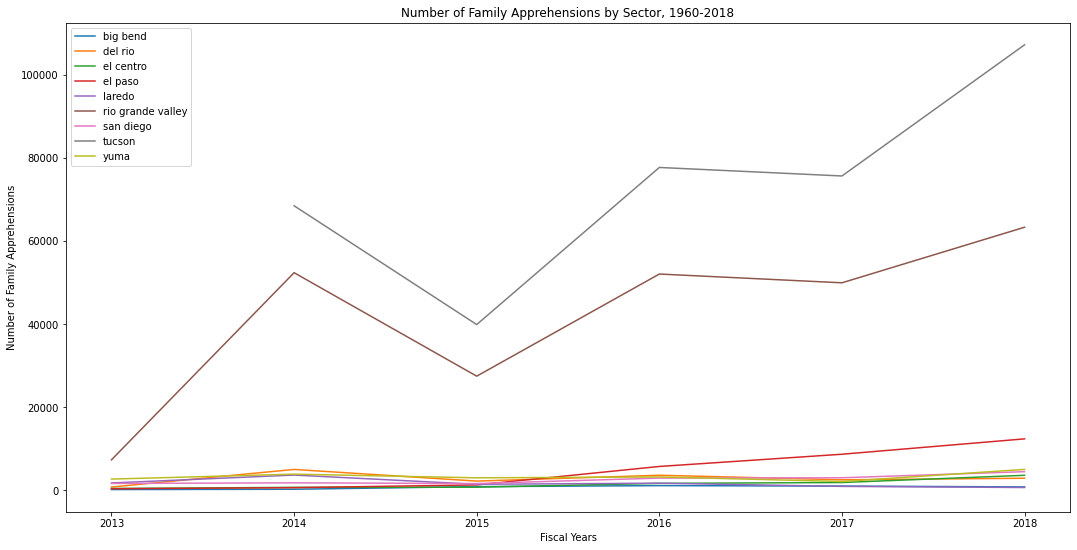

In [25]:
apprehension_family_plot=swborder_sectors_df.groupby('sector')['family_apprehensions'].plot(figsize=(18,9), 
                                                                                                    legend=True, ylabel='Number of Family Apprehensions',
                                                                                                   xlabel='Fiscal Years', title='Number of Family Apprehensions by Sector, 1960-2018')


## Observations:

- minor apprehensions have increased over time, with peak spikes in 2013 and 2015 for both unaccompanied and accompanied minors 
    - for unaccompanied minors: spiked in FY 2013, then again in FY 2015, before leveling out in FY 2017
        - most unaccompanied migrants coming through Rio Grande Valley 
    - for accompanied minors: spiked in FY 2013, then again in FY 2015 and has steadily increased since then towards 35,000 minor apprehensions for the southwest border 
    - note: minor apprehensions(accompanied and unaccompanied) spiked in FY 2017 onwards, could be because of Trump policies enacted in the same year separating kids from families 
        - most accompanied migrants coming through Rio Grande Valley 

- family apprehensions have increased over time, with peak spikes in 2013, 2015, and 2017 
    - most families coming through Tucson sector, followed by Rio Grande Valley 

## Lets look at Sectors: El Paso, Tucson, and RGV more closely

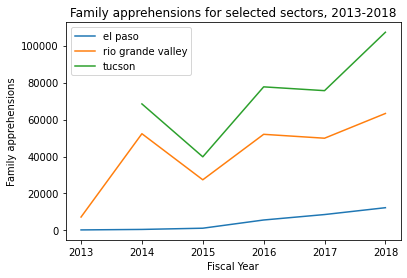

In [26]:
#looking at el paso, tucson, and RGV sectors more closely - family apprehensions 
sector_to_use = ['tucson', 'rio grande valley', 'el paso']
sector_to_use_filter = swborder_sectors_df['sector'].isin(sector_to_use)

ts_plot=swborder_sectors_df[sector_to_use_filter].groupby('sector')['family_apprehensions'].plot( 
                                                              legend=True,xlabel='Fiscal Year', ylabel='Family apprehensions',
                                                             title="Family apprehensions for selected sectors, 2013-2018")


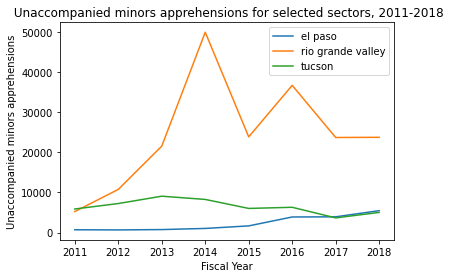

In [27]:
#looking at el paso, tucson, and RGV sectors more closely - unaccompanied minors apprehensions 
ts_plot=swborder_sectors_df[sector_to_use_filter].groupby('sector')['unaccompanied_juveniles'].plot( 
                                                              legend=True,xlabel='Fiscal Year', ylabel='Unaccompanied minors apprehensions',
                                                             title=" Unaccompanied minors apprehensions for selected sectors, 2011-2018")


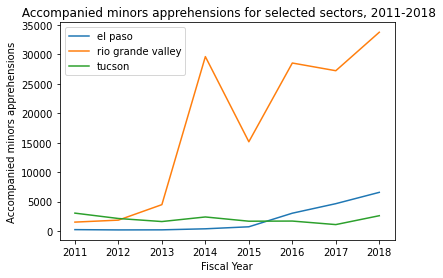

In [28]:
#looking at el paso, tucson, and RGV sectors more closely - unaccompanied minors apprehensions 
ts_plot=swborder_sectors_df[sector_to_use_filter].groupby('sector')['accompanied_juveniles'].plot( 
                                                              legend=True, xlabel='Fiscal Year', ylabel='Accompanied minors apprehensions',
                                                             title=" Accompanied minors apprehensions for selected sectors, 2011-2018")


### interesting observation for all three apprehension line graphs
    - El Paso sector has ~0 apprehensions for all three types up until 2015 when we see a giant spike 
        - unaccompanied migrants:
            - RGV sector: 
                - RGV before 2015: <49959
                - RGV 2015: 23864
                - RGV 2016: 36714
                    -from 2015 to 2016, RGV unaccompanied migrant apprehensions grew 53% 
            - Tucson sector: 
                - Tucson before 2015: <8262
                - Tucson 2015: 6019
                - Tucson 2016: 6302
                    from 2015 to 2016, Tucson unaccompanied migrant apprehensions stayed roughly the same 
            - El Paso sector: 
                - el paso before 2015: <1029
                - el paso 2015:  1662
                - el paso 2016: 3885
                    from 2015 to 2016, El Paso unaccompanied migrant apprehensions grew(133%) ~ 2.3x or 

        - accompanied migrants: 
            - RGV sector: 
                - RGV before 2015: <29618
                - RGV 2015: 15157
                - RGV 2016: 28530
                    -from 2015 to 2016, RGV accompanied migrant apprehensions almost doubled (88%) or 1.8x  or about a 2-fold increase 
            - Tucson sector: 
                - Tucson before 2015: <2382
                - Tucson 2015: 1663
                - Tucson 2016: 1687
                    from 2015 to 2016, Tucson accompanied migrant apprehensions stayed roughly the same  
            - El Paso sector: 
                - el paso before 2015: <372
                - el paso 2015:  715
                - el paso 2016: 3022
                    from 2015 to 2016, El Paso accompanied migrant apprehensions grew(322%) or about 4.2x or more than 4-fold increase 

        - family apprehensions:
            - RGV sector: 
                - RGV before 2015: <52326
                - RGV 2015: 27409
                - RGV 2016: 52006
                    -from 2015 to 2016, RGV family apprehensions almost doubled (89%) or 1.89x  or about a 2-fold increase 
            - Tucson sector: 
                - Tucson before 2015: <68445
                - Tucson 2015: 39836
                - Tucson 2016: 77674
                    from 2015 to 2016, Tucson family apprehensions almost doubled (95%) or about a 1.96x or a 2-fold increase   
            - El Paso sector: 
                - el paso before 2015: <562
                - el paso 2015:  1220
                - el paso 2016: 5664
                    from 2015 to 2016, El Paso family apprehensions grew(364%) or about 4.6x or more than 4-fold increase 


## Lets look at deaths over time and death rate over time 

In [29]:
swborder_overall['deaths'].max() #max of 492 total deaths for the southern border for fiscal year 2005

492.0

<AxesSubplot:title={'center':'Number of Apprehensions by Type for Fiscal Years, 2011-2018'}, xlabel='Fiscal Year', ylabel='Number of Apprehensions'>

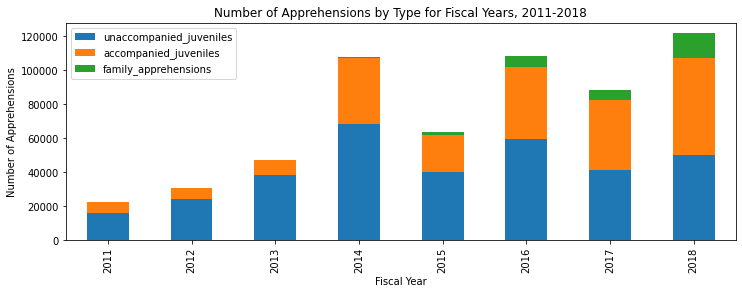

In [56]:
# select the columns to use in the plot
cols_to_plot = ['unaccompanied_juveniles', 'accompanied_juveniles', 'family_apprehensions']

# resort the rows for year order
swborder_overall2 = swborder_overall2.sort_index()

# select the rows you want to plot
year_filter = swborder_overall2.index>2010

swborder_overall2[year_filter][cols_to_plot].plot(kind='bar', stacked=True, xlabel='Fiscal Year', ylabel='Number of Apprehensions', title='Number of Apprehensions by Type for Fiscal Years, 2011-2018', figsize=(12,4))

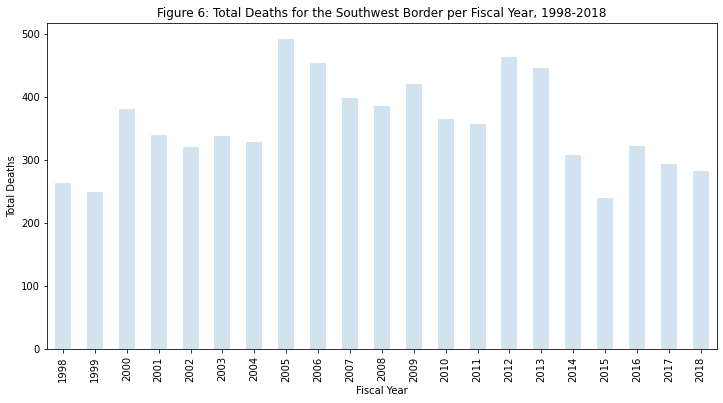

In [58]:
#filtering out years before 1998 due to no death data available 

year_filter_deaths = swborder_overall['fiscal_year']>1997

ax3=swborder_overall[year_filter_deaths].plot(kind='bar', x='fiscal_year', y='deaths', legend=False, alpha=0.2, figsize=(12,6))

plt.xlabel('Fiscal Year')
plt.ylabel('Total Deaths')
plt.title('Figure 6: Total Deaths for the Southwest Border per Fiscal Year, 1998-2018');

ax3.invert_xaxis()



Scrap code for above graph 
    totals = []

#find the values and append to list
for i in ax3.patches:
        totals.append(i.get_height())

#set individual bar labels using above list
total = sum(totals)

#set individual bar labels using above list
for i in ax3.patches:
    
    # get_x pulls left or right; get_height pushes up or down
    ax3.text(i.get_x()+1.5, i.get_height()+2.7, \
            str(round((i.get_height()), 2)), fontsize=7, color='black')
    
#flipping the x-axis to be 1960-2018 instead of 2018-1960
ax3.invert_xaxis()



## Observations: 

- we see that FY 2005 had the highest known(reported) death count at 492 deaths 
- followed by FY 2012, with 463 reported deaths 
- followed by 2006, with 454 reported deaths 

## Interpretations: 

Secure Borders Act (implemented 2006) 
* remember we saw a decrease in total apprehensions for FY 2007-2008 (decrease from 858638 in FY 2007 to 705005 in FY 2008)
* but did the migrant death count get higher per amount of apprehensions, or did it also fall?

  - FY 2007 to FY 2008: decrease in migrant deaths from 398 to 395  
      - for FY 2007: 858638/398= death rate of .046% 
      - for FY 2008: 705005/395= death rate of .056% -> decline in total apprehensions and decline in total deaths, but the death rate increased from the FY 2007 to FY 2008
 
  

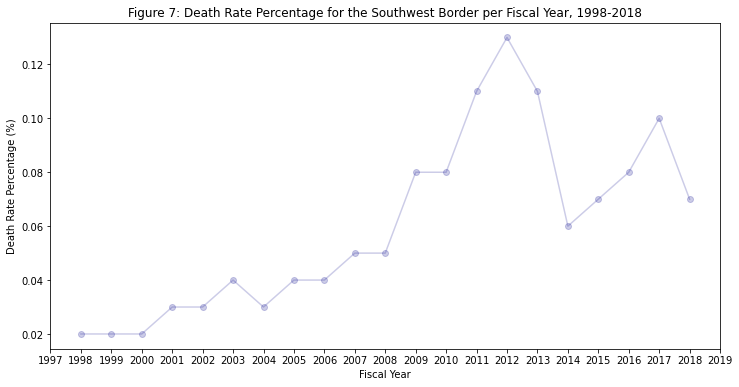

In [52]:
ax4=swborder_overall.plot(kind='line', x='fiscal_year', y='death_rate_perc', color='darkblue', marker='o', legend=False, alpha=0.2, figsize=(12,6))

plt.xlabel('Fiscal Year')
plt.ylabel('Death Rate Percentage (%)')
plt.xticks(ticks=None)
plt.locator_params(axis="x", nbins=40)
plt.locator_params(axis="y", nbins=12)
plt.title('Figure 7: Death Rate Percentage for the Southwest Border per Fiscal Year, 1998-2018');

#putting labels signifying y values on top of each bar 

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax4.patches:
        totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax4.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax4.text(i.get_x()+1.5, i.get_height()+2.7, \
            str(round((i.get_height()), 2)), fontsize=7, color='black')
    
#death data only available from 1998-2018

## Observations:
- Interesting that FY 2012 had the highest death rate percentage but if we look at the apprehensions, FY 2000 had the highest apprehension count  


## Creating Line Graph plotting Death Rate over Total Apprehensions over time for fiscal years 1998-2018(need help here) #also need to cut off 1997 and 2019

AttributeError: 'Rectangle' object has no property 'sort'

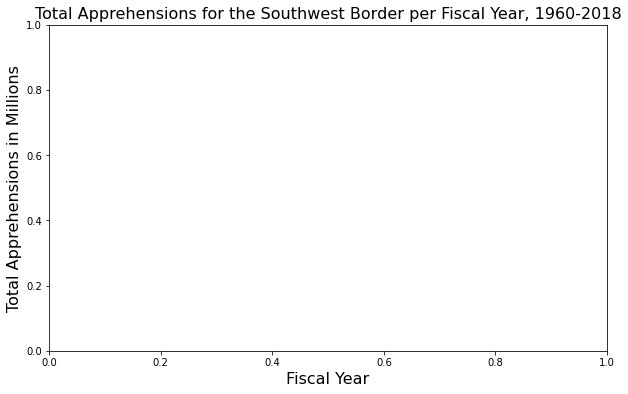

In [33]:


#Create combo chart
fig, ax2 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax2.set_title('Total Apprehensions for the Southwest Border per Fiscal Year, 1960-2018', fontsize=16)
ax2.set_xlabel('Fiscal Year', fontsize=16)
ax2.set_ylabel('Total Apprehensions in Millions', fontsize=16)
ax2 = sns.barplot(x='fiscal_year', y='total_apprehensions', data=swborder_overall, sort=False, legend=False, alpha=0.2, figsize=(12,6))
ax2.tick_params(axis='y')
ax2.invert_xaxis()

#specify we want to share the same x-axis
ax4 = ax2.twinx()
color = 'tab:red'
#line plot creation
ax4.set_ylabel('Death Rate Percentage %', fontsize=16)
ax4=sns.lineplot(x='fiscal_year', y='death_rate_perc', data =swborder_overall, color='blue', marker='o', legend=False, alpha=0.2, figsize=(12,6))
ax4.tick_params(axis='y', color=color)
#show plot
plt.show

## Looking at Violence as a measure of assaults, deaths and rescues 

<AxesSubplot:title={'center':'Figure 8: Violence on the Southern Border per fiscal year, 2011-2018'}, xlabel='Fiscal Year', ylabel='Counts of Violence by Type'>

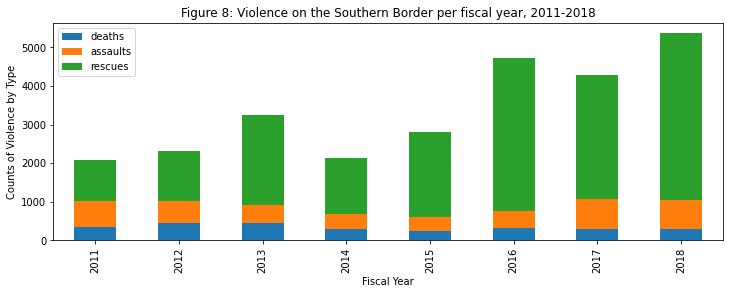

In [54]:
# select the columns to use in the plot
cols_to_plot = ['deaths', 'assaults', 'rescues']

# resort the rows for year order
swborder_overall2 = swborder_overall2.sort_index()

# select the rows you want to plot
year_filter = swborder_overall2.index>2010

swborder_overall2[year_filter][cols_to_plot].plot(kind='bar', stacked=True, xlabel='Fiscal Year', ylabel='Counts of Violence by Type', title='Figure 8: Violence on the Southern Border per fiscal year, 2011-2018', figsize=(12,4))

## Interpretation: 

- Number of rescues are *increasing* as those who cross the southern border use more dangerous corridors to do so, bringing about higher rate of rescues

- Assaults dipped in 2014 and then rose again steadily afterwards 

- not dealing with death here bc we made a death rate and compared it to total apprehensions 